In [82]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [83]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
file1 = pd.read_csv("/content/drive/MyDrive/DRIVE GONZALO/mateoIA/ML/KNN Práctica 3/adult90.csv")

In [85]:
file1.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [86]:
nativecountry = file1["native-country"]
nativecountry.astype('category')

0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
48837    United-States
48838    United-States
48839    United-States
48840    United-States
48841    United-States
Name: native-country, Length: 48842, dtype: category
Categories (42, object): ['?', 'Cambodia', 'Canada', 'China', ..., 'Trinadad&Tobago',
                          'United-States', 'Vietnam', 'Yugoslavia']

In [87]:
occupation = file1["occupation"]
occupation.astype('category')

0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                        ?
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48842, dtype: category
Categories (15, object): ['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', ...,
                          'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']

In [88]:
relationship = file1["relationship"]
relationship.astype('category')

0        Own-child
1          Husband
2          Husband
3          Husband
4        Own-child
           ...    
48837         Wife
48838      Husband
48839    Unmarried
48840    Own-child
48841         Wife
Name: relationship, Length: 48842, dtype: category
Categories (6, object): ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried',
                         'Wife']

In [89]:
education = file1["education"]
education.astype('category')

0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48842, dtype: category
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool',
                          'Prof-school', 'Some-college']

In [90]:
relationship = file1["income"]
relationship.astype('category')

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [91]:
file1['income'] = file1['income'].map({'<=50K': 0, '>50K': 1})

In [92]:
file1.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [93]:
c1 = pd.get_dummies(file1['workclass'], prefix='Workclass', dtype=int)
c2 = pd.get_dummies(file1['education'], prefix='Education', dtype=int)
c3 = pd.get_dummies(file1['marital-status'], prefix='marital-status', dtype=int)
c4 = pd.get_dummies(file1['race'], prefix='race', dtype=int)
c5 = pd.get_dummies(file1['gender'], prefix='gender', dtype=int)
c6 = pd.get_dummies(file1['occupation'], prefix='occupation', dtype=int)
c7 = pd.get_dummies(file1['relationship'], prefix='relationship', dtype=int)
c8 = pd.get_dummies(file1['native-country'], prefix='native-country', dtype=int)

In [94]:
file1['educational-num'] = file1['educational-num'].astype(float)
maxval = file1['educational-num'].max()
file1['educational-num'] = file1['educational-num'] / maxval

In [95]:
file1['age'] = file1['age'].astype(float)
maxval = file1['age'].max()
file1['age'] = file1['age'] / maxval

In [96]:
file1['hours-per-week'] = file1['hours-per-week'].astype(float)
maxval = file1['hours-per-week'].max()
file1['hours-per-week'] = file1['hours-per-week'] / maxval

In [97]:
file1['capital-gain'] = file1['capital-gain'].astype(float)
maxval = file1['capital-gain'].max()
file1['capital-gain'] = file1['capital-gain'] / maxval

In [98]:
file1['capital-loss'] = file1['capital-loss'].astype(float)
maxval = file1['capital-loss'].max()
file1['capital-loss'] = file1['capital-loss'] / maxval

In [99]:
file1['hours-per-week'] = file1['hours-per-week'].astype(float)
maxval = file1['hours-per-week'].max()
file1['hours-per-week'] = file1['hours-per-week'] / maxval

In [100]:
file1.pop('workclass')
file1.pop('education')
file1.pop('marital-status')
file1.pop('race')
file1.pop('gender')
file1.pop('occupation')
file1.pop('relationship')
file1.pop('native-country')
file1.pop('fnlwgt')

0        226802
1         89814
2        336951
3        160323
4        103497
          ...  
48837    257302
48838    154374
48839    151910
48840    201490
48841    287927
Name: fnlwgt, Length: 48842, dtype: int64

In [101]:
file2 = pd.concat([file1, c1, c2, c3, c4, c5, c6, c7, c8], axis=1)

In [102]:
file2.head(10)

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,Workclass_?,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.277778,0.4375,0.000000,0.0,0.404040,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.422222,0.5625,0.000000,0.0,0.505051,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.311111,0.7500,0.000000,0.0,0.404040,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.488889,0.6250,0.076881,0.0,0.404040,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.200000,0.6250,0.000000,0.0,0.303030,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0.377778,0.3750,0.000000,0.0,0.303030,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.322222,0.5625,0.000000,0.0,0.404040,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0.700000,0.9375,0.031030,0.0,0.323232,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0.266667,0.6250,0.000000,0.0,0.404040,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.611111,0.2500,0.000000,0.0,0.101010,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [103]:
Xvalues = file2.values

In [104]:
Yvalues = file1['income'].values

In [105]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xvalues, Yvalues, test_size=0.3, random_state=42)

In [106]:
knn = KNeighborsClassifier(n_neighbors=9)

In [107]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=9)

In [108]:
ypred = knn.predict(Xtest)
print(ypred)

[0 0 1 ... 0 0 0]


In [109]:
accuracy = accuracy_score(ytest, ypred)
print(f'Precisión del clasificador KNN: {accuracy:.2f}')

Precisión del clasificador KNN: 0.97


          Predicted 0  Predicted 1
Actual 0        11133          100
Actual 1          339         3081


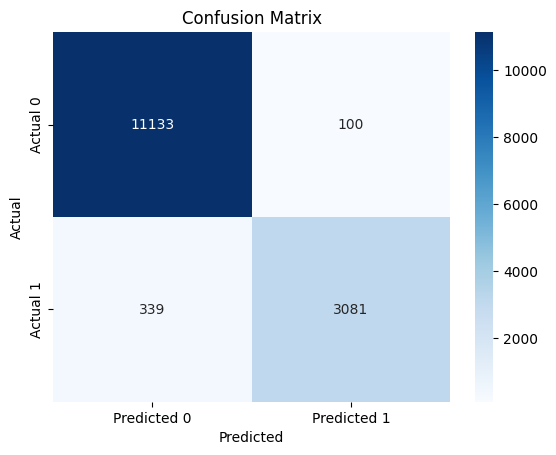

In [110]:
y = pd.Series(ytest)
x = pd.Series(ypred)
conf_matrix = confusion_matrix(y,x)
labels = sorted(list(set(y) | set(x)))
df_conf_matrix = pd.DataFrame(conf_matrix, index=[f'Actual {label}' for label in labels], columns=[f'Predicted {label}' for label in labels])

print(df_conf_matrix)
sns.heatmap(df_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()